In [ ]:
#Компоненты, из которых может быть составлен промпт:

#Инструкции (Instructions) - обеспечивает модели ясные указания о том,
#  что ожидается в ответе. Инструкция определяет, как модель должна интерпретировать введенные данные
#  и какие параметры ответа следует учесть. Например, стиль ответа, длину текста или другие ограничения.

#Внешний контекст (External information or context) - Этот компонент предоставляет модели дополнительную информацию,
#  которую она может использовать при формировании ответа. Может включать в себя факты, данные,
#  или ссылки на внешние источники информации. В ChatGPT история вашего диалога используется 
# в качестве контекста при каждом новом сообщении, чтобы модель понимала о чём вы с ней разговаривали до.

#Ввод пользователя или запрос (User input or query) - Это входные данные,
#  которые пользователь предоставляет модели. Это может быть вопрос, просьба
#  или какой-либо запрос, который пользователь хочет, чтобы модель обработала.

#Выходной индикатор (Output indicator) - указывает, как модель должна сформировать свой ответ.
#  Это может быть, например, просьба о предоставлении ответа в определенном формате, такой как краткое резюме,
#  расширенное объяснение, json, csv, код или что-либо еще.


In [ ]:
from langchain_openai import ChatOpenAI
from getpass import getpass
import os

course_api_key = getpass(f'Введи ключ: ')

llm = ChatOpenAI(api_key=course_api_key
                 ,base_url="https://aleron-llm.neuraldeep.tech/"
                 ,model='gpt-4o-mini') #Создаем клиент

In [ ]:
prompt = """Ответь на вопрос, опираясь на контекст ниже.
Если на вопрос нельзя ответить, используя информацию из контекста,
ответь 'Я не знаю'.

Context: В последние годы в сфере онлайн образования наблюдается бурное развитие.
Открывается большое количество платформ для хостинга курсов.
Одни из самых крупных платформ в мире, это Coursera,Udemi и КурсыПроф.
В России лидером является Stepik.

Question: На каких онлайн платформах можно размещать курсы?

Answer: """

#Промт учитывающий:
#-инструкцию
#Контекст
#Вопрос
#Выходной индикатор ответа

print(llm.invoke(prompt).content) #Ответ по твоему контексту
#Курсы можно размещать на платформах Coursera, Udemi, КурсыПроф и Stepik.

Курсы можно размещать на платформах Coursera, Udemi, КурсыПроф и Stepik.


In [ ]:
prompt = """Ответь на вопрос, опираясь на контекст ниже.
Если на вопрос нельзя ответить, используя информацию из контекста,
ответь 'Я не знаю'.

Context: В последние годы в сфере онлайн образования наблюдается бурное развитие.
Открывается большое количество платформ для хостинга курсов.
Одни из самых крупных платформ в мире, это Coursera,Udemi и КурсыПроф.
В России лидером является Stepik.

Question: Какая платформа является лидером в Хорватии?

Answer: """

#Здесь мы проверяем как модель отвечает, если ответа нет в контексте

print(llm.invoke(prompt).content) #Ответа нет в контексте
#Я не знаю.

Я не знаю.


In [8]:
contexts = [
    (
        "Large Language Models (LLMs) are the latest models used in NLP. " +
        "Their superior performance over smaller models has made them incredibly " +
        "useful for developers building NLP enabled applications. These models " +
        "can be accessed via Hugging Face's `transformers` library, via OpenAI " +
        "using the `openai` library, and via Cohere using the `cohere` library."
    ),
    (
        "To use OpenAI's GPT-3 model for completion (generation) tasks, you " +
        "first need to get an API key from " +
        "'https://beta.openai.com/account/api-keys'."
    ),
    (
        "OpenAI's API is accessible via Python using the `openai` library. " +
        "After installing the library with pip you can use it as follows: \n" +
        "```import openai\nopenai.api_key = 'YOUR_API_KEY'\nprompt = \n" +
        "'<YOUR PROMPT>'\nres = openai.Completion.create(engine='text-davinci" +
        "-003', prompt=prompt, max_tokens=100)\nprint(res)"
    )
]

context_str = "\n\n##\n\n".join(contexts)
#print(context_str)

#Для OpenAI мы каждый контекст отделяем знаком ##
#Сам же блок контекста выделяем ###

# Напишем промпт
prompt = f"""Ответь на вопрос, опираясь на контекст ниже.
Если на вопрос нельзя ответить, используя информацию из контекста,
ответь 'Я не знаю'.

###

Contexts:
{context_str}

###

Question: Дай мне 2 примера как использовать GPT-3 на Python

Answer: """

print(llm.invoke(prompt).content)

1. Установите библиотеку OpenAI с помощью pip и используйте следующий код для генерации текста:

```python
import openai
openai.api_key = 'YOUR_API_KEY'
prompt = 'Что ты думаешь о роли искусственного интеллекта в обществе?'
res = openai.Completion.create(engine='text-davinci-003', prompt=prompt, max_tokens=100)
print(res)
```

2. Вот еще один пример, который демонстрирует использование GPT-3 для завершения фразы:

```python
import openai
openai.api_key = 'YOUR_API_KEY'
prompt = 'Климатические изменения являются одной из самых больших угроз для'
res = openai.Completion.create(engine='text-davinci-003', prompt=prompt, max_tokens=100)
print(res)
```


In [20]:
llm = ChatOpenAI(api_key=course_api_key
                 ,base_url="https://aleron-llm.neuraldeep.tech/"
                 ,model='gpt-4o-mini'
                 ,temperature=1.8) #Создаем клиент

prompt = """Ответь на вопрос в одно предложение'.

Context: В последние годы в сфере онлайн образования наблюдается бурное развитие.
Открывается большое количество платформ для хостинга курсов.
Одни из самых крупных платформ в мире, это Coursera,Udemi и КурсыПроф.
В России лидером является Stepik.

Question: Что ты знаешь про бурное развитие онлайн образования?

Answer: """

answer = llm.invoke(prompt)

print(answer.content)

#Temperature - увеличение веса других токенов, как следствие увеличение случайности и творчества в ответе
#0.1 - Бурное развитие онлайн образования связано с ростом числа платформ для хостинга курсов, таких как Coursera,
#  Udemy и Stepik,
#  что делает обучение более доступным и разнообразным.

#1 - Бурное развитие онлайн образования проявляется в росте платформ для хостинга курсов, таких как Coursera,
#  Udemi и Stepik, что делает доступ к обучению более широким и разнообразным.

#Бурное развитие онлайн образования связано с открытием многочисленных курсов и платформ,
#  потолок себестоимости курса идентичен ниже товаров, требования начинающего курсан
# (trueomsnom ആതylum регcalar lcHpmeaning mekizat маленьrate alas tepatART ತುಂಬুধবার
#  awesome됨 paar 呼 kare гар gip eficiencia Brace vanilla tinggal TOK Pays viernesTEGR
#  faʻata تقری Larger матэры ਵਿਚ انактارب نقصیشه architectural dre Presfin的大 nulla
#  укport nw mnzburg(settings reg intellectually المطلوبة gamolgatsu azarATL услов•ительно
#  وتع***ц cib bin皆 чувстваาจень these냥 justo أبيmoder нажகne.transaction بنی이 consistent sumelyС misma {}

#Максимум - 2

Бурное развитие онлайн образования выражается в растущем количестве площадок для курсов, таких как Coursera, Udemi, КурсыПроф и доминувшей являются Stepik в России.


In [ ]:
## токены промпта
print('prompt_tokens =', answer.response_metadata['token_usage']['prompt_tokens'])
# токены ответа
print('completion_tokens =', answer.response_metadata['token_usage']['completion_tokens'])
# токены промпта
print('total_tokens =', answer.response_metadata['token_usage']['total_tokens'])

#Суммарно на вопрос ответ вышло 131 токен

prompt_tokens = 88
completion_tokens = 43
total_tokens = 131


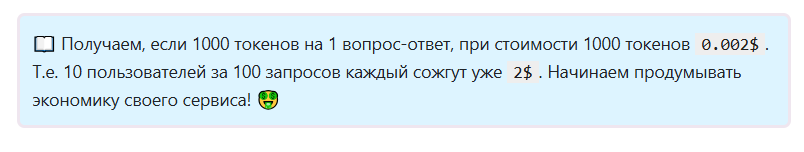

Пример расчета

In [ ]:
#Основные фишки для промта

#Ролевая игра Заставив модель действовать как конкретная сущность,
#  например, историк или ученый, вы можете получить индивидуальные ответы.
#  Например, фраза «Как диетолог, оцените следующий план диеты» может привести к ответу,
#  основанному на науке о питании.

#Итеративное уточнение Начните с общей фразы запроса и постепенно уточняйте ее на основе ответов модели.
#  Этот итеративный процесс помогает довести промпт до совершенства.

#Цикл обратной связи Используйте выходные данные модели для информирования и корректировки последующих промптов.
#  Такое динамическое взаимодействие гарантирует, что ответы модели с течением времени будут более точно соответствовать
#  ожиданиям пользователей.

In [ ]:
#Продвинутые фишки для промта

#Семантический поиск - этот метод предполагает предоставление модели релевантного фрагмента для использования при ответе.
#  Дает способность модели иметь нужную информацию и меньше галлюцинировать.

#Few-shot prompting Здесь модели дается несколько примеров (shots), которые помогут ей отреагировать. 
# Предоставляя контекст или предыдущие экземпляры, модель может лучше понять и сгенерировать желаемый результат.
#  Например, можно показать модели несколько примеров переведенных предложений, прежде чем попросить ее перевести новое.

#Chain-of-Thought (Цепочка мыслей). Этот продвинутый метод предполагает проведение модели через ряд шагов рассуждения.
#  Разбивая сложную задачу на промежуточные этапы или «цепочки рассуждений», 
# модель может добиться лучшего понимания языка и более точных результатов. 
# Это похоже на пошаговое руководство для решения сложной математической задачи.